In [1]:
import os
import cv2
import json
import datetime
import numpy as np
import pandas as pd
import skimage.draw
import matplotlib.pyplot as plt

# Import Mask RCNN libraries
from mrcnn.visualize import display_instances
from mrcnn import model as modellib, utils
from mrcnn.config import Config
import mrcnn.mrcnnCustom as mrcnnCustom
import mrcnn.updatedUtils as updatedUtils

Using TensorFlow backend.


In [2]:
# Set TensorFlow logging level
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
# Defining directory paths 
PATHS = {
    "root_dir": "dataset",
    "checkpoint_path": "model/logs",
    "weights_path": "model/pretrained_weights/mbrsc_maskRCNN_pretrained.h5",
    "epochs_capture_path": "model/logs/epochs_detail.txt"
}

objectList = ["petrol station"]
epochs = 80

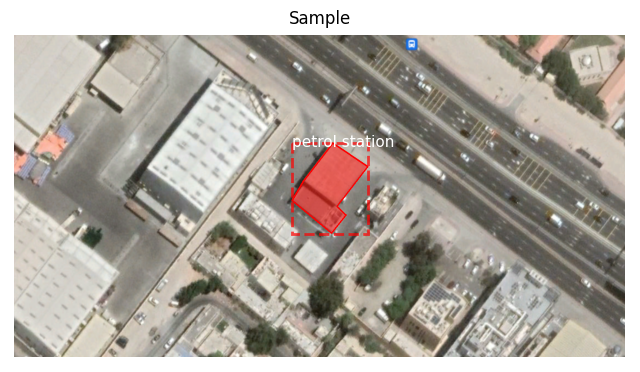

In [4]:
dataset_train = mrcnnCustom.CustomDataset()
dataset_train.load_custom(PATHS["root_dir"], "train", objectList)
dataset_train.prepare()

image_ids = np.random.choice(dataset_train.image_ids, 1)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    bbox = utils.extract_bboxes(mask)
    display_instances(image, bbox, mask, class_ids, dataset_train.class_names, title="Sample", figsize=(8, 8))

In [5]:
# Training config
class TrainingConfig(Config):
    NAME = "petrol station"
    
    # Max is 2
    IMAGES_PER_GPU = 2

    # Background + object of interest
    NUM_CLASSES = 1 + 1

    # Threshold
    DETECTION_MIN_CONFIDENCE = 0.9


config = TrainingConfig()

In [6]:
# Training the model
model = modellib.MaskRCNN(mode="training", config=config, model_dir=PATHS["checkpoint_path"])
model.load_weights(PATHS["weights_path"], by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead








In [7]:
# %%capture train_output
# Save the following epochs output to a text file to plot the losses 
mrcnnCustom.trainModel(config, model, objectList, epochs)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: model/logs\petrol station20241001T2009\mask_rcnn_petrol station_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (Time

10/10 [==============================] - 347s 35s/step - loss: 0.7356 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.1981 - mrcnn_class_loss: 0.0328 - mrcnn_bbox_loss: 0.2522 - mrcnn_mask_loss: 0.2432 - val_loss: 1.0494 - val_rpn_class_loss: 0.0094 - val_rpn_bbox_loss: 0.2969 - val_mrcnn_class_loss: 0.0399 - val_mrcnn_bbox_loss: 0.3932 - val_mrcnn_mask_loss: 0.3100
Epoch 17/80
10/10 [==============================] - 342s 34s/step - loss: 0.8243 - rpn_class_loss: 0.0103 - rpn_bbox_loss: 0.1880 - mrcnn_class_loss: 0.0581 - mrcnn_bbox_loss: 0.3112 - mrcnn_mask_loss: 0.2566 - val_loss: 1.1741 - val_rpn_class_loss: 0.0104 - val_rpn_bbox_loss: 0.3266 - val_mrcnn_class_loss: 0.0390 - val_mrcnn_bbox_loss: 0.4489 - val_mrcnn_mask_loss: 0.3492
Epoch 18/80
10/10 [==============================] - 341s 34s/step - loss: 0.7726 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.1839 - mrcnn_class_loss: 0.0425 - mrcnn_bbox_loss: 0.2787 - mrcnn_mask_loss: 0.2590 - val_loss: 0.6452 - val_rpn_class_loss: 0.0107 

Epoch 38/80
10/10 [==============================] - 342s 34s/step - loss: 0.6691 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.1640 - mrcnn_class_loss: 0.0398 - mrcnn_bbox_loss: 0.2258 - mrcnn_mask_loss: 0.2331 - val_loss: 0.8380 - val_rpn_class_loss: 0.0042 - val_rpn_bbox_loss: 0.2614 - val_mrcnn_class_loss: 0.0399 - val_mrcnn_bbox_loss: 0.3177 - val_mrcnn_mask_loss: 0.2148
Epoch 39/80
10/10 [==============================] - 345s 34s/step - loss: 0.7926 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.1880 - mrcnn_class_loss: 0.0436 - mrcnn_bbox_loss: 0.2896 - mrcnn_mask_loss: 0.2624 - val_loss: 1.0480 - val_rpn_class_loss: 0.0086 - val_rpn_bbox_loss: 0.3218 - val_mrcnn_class_loss: 0.0475 - val_mrcnn_bbox_loss: 0.3773 - val_mrcnn_mask_loss: 0.2929
Epoch 40/80
10/10 [==============================] - 340s 34s/step - loss: 0.6926 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.1878 - mrcnn_class_loss: 0.0440 - mrcnn_bbox_loss: 0.2435 - mrcnn_mask_loss: 0.2105 - val_loss: 0.7114 - val_rpn_class_l

Epoch 60/80
10/10 [==============================] - 322s 32s/step - loss: 0.4362 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.0959 - mrcnn_class_loss: 0.0306 - mrcnn_bbox_loss: 0.1392 - mrcnn_mask_loss: 0.1636 - val_loss: 1.1215 - val_rpn_class_loss: 0.0071 - val_rpn_bbox_loss: 0.3713 - val_mrcnn_class_loss: 0.0392 - val_mrcnn_bbox_loss: 0.4056 - val_mrcnn_mask_loss: 0.2983
Epoch 61/80
10/10 [==============================] - 322s 32s/step - loss: 0.5484 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.1246 - mrcnn_class_loss: 0.0379 - mrcnn_bbox_loss: 0.1842 - mrcnn_mask_loss: 0.1945 - val_loss: 0.6520 - val_rpn_class_loss: 0.0048 - val_rpn_bbox_loss: 0.1680 - val_mrcnn_class_loss: 0.0425 - val_mrcnn_bbox_loss: 0.2439 - val_mrcnn_mask_loss: 0.1929
Epoch 62/80
10/10 [==============================] - 323s 32s/step - loss: 0.4604 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.1177 - mrcnn_class_loss: 0.0316 - mrcnn_bbox_loss: 0.1281 - mrcnn_mask_loss: 0.1774 - val_loss: 0.6895 - val_rpn_class_l

In [8]:
# print(train_output)

# with open(PATHS["epochs_capture_path"], "w") as f:
#     f.write(train_output.stdout)

In [9]:
# Function to scrape the loss values from text files (The epoch information is copied to a text file) to plot the graph 
def plotPoints(filepath):
    count = 1
    trainLoss = {}
    valLoss = {}

    with open(filepath) as f:
        while f.readline():
            lines = f.readline()

            # Find training loss index
            index = lines.find(' - loss: ')
            
            # Find validation loss index
            valIndex = lines.find('val_loss: ')

            if(index != -1 and valIndex != -1):
                lossvalue = lines[index+9: index+15]
                valloss = lines[valIndex+10: valIndex+16]

                # Add to dicts
                trainLoss[count] = float(lossvalue)
                valLoss[count] = float(valloss)

                count += 1
    return [trainLoss, valLoss]

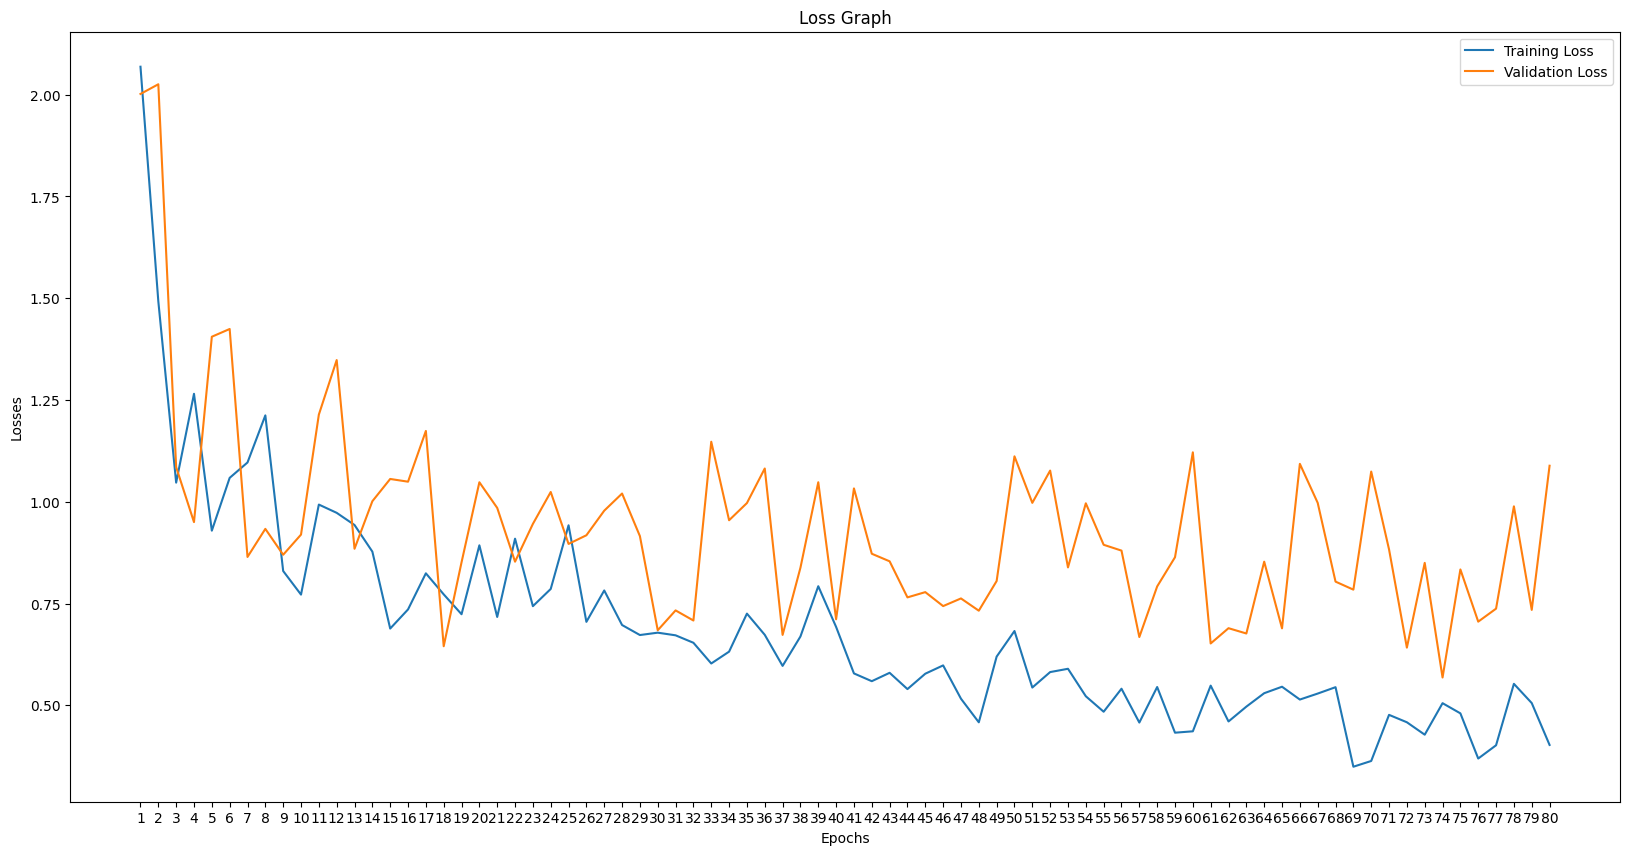

In [12]:
trainLoss, valLoss = plotPoints(PATHS["epochs_capture_path"])

# Plotting the loss graph
plt.figure(figsize=(20, 10))
plt.plot(list(trainLoss.keys()), list(trainLoss.values()),label='Training Loss')
plt.plot(list(valLoss.keys()), list(valLoss.values()),label='Validation Loss')
plt.xticks(list(valLoss.keys()))
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

In [ ]:
model 